In [1]:
# In[ ]:
# ** import package **
import os
import sys
import json
import pathlib
sys.path.append("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import traceback
from tqdm import tqdm
from datetime import timedelta
from _utils.customlogger import customlogger as CL

pd.set_option('display.max_colwidth', -1)  #각 컬럼 width 최대로 
pd.set_option('display.max_rows', 50)      # display 50개 까지 


/home/suncheol/code/PPFL/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  app.launch_new_instance()


In [12]:
# In[ ]:
# ** loading path info **
current_dir = pathlib.Path.cwd()
parent_dir = current_dir.parent
curr_file_name = os.path.splitext(os.path.basename(os.path.abspath('')))[0]
result_dir = parent_dir.joinpath('result', 'eicu')
pathlib.Path.mkdir(result_dir, mode=0o777, parents=True, exist_ok=True)

edges_name = ['edge_1', 'edge_2', 'edge_3']
central_name = ['central']

In [29]:
feature_importance_dict = {}
model_performance_dict = {}
for edge_name in (central_name + edges_name):
    feature_importance_dict[edge_name] = pd.read_feather(result_dir.joinpath(edge_name, 'feature_importance.feather')).transpose()
    model_performance_dict[edge_name] = pd.read_feather(result_dir.joinpath(edge_name, 'model_performance.feather')).transpose()

In [5]:
# annotate each cell with the numeric value of integer format
# heatmap by seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def convertRank(df):
    df = df.copy()
    for col in df.columns:
        df[col] = df[col].rank(ascending=False)
    return df.astype('int32')

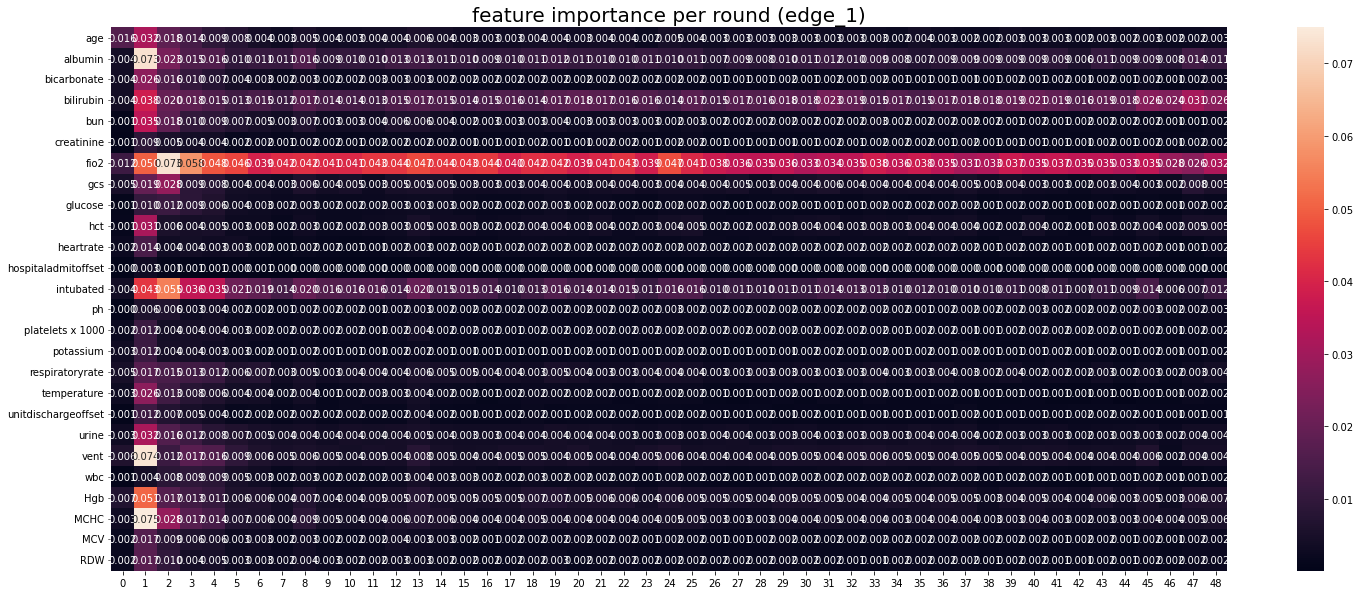

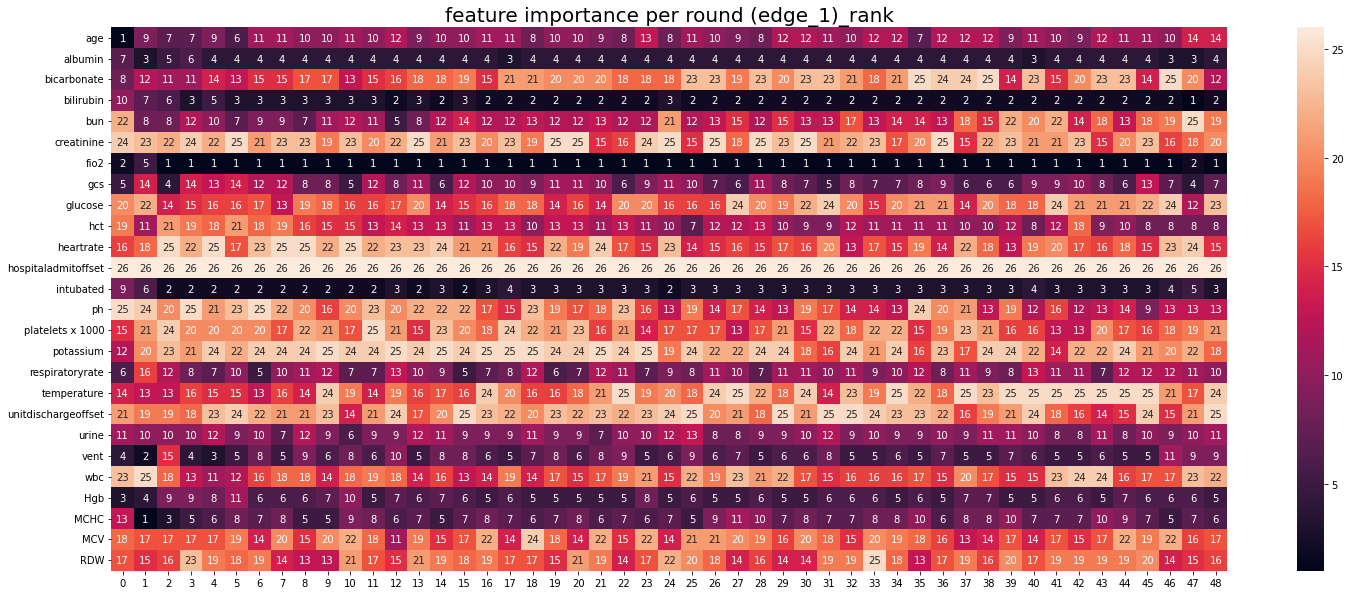

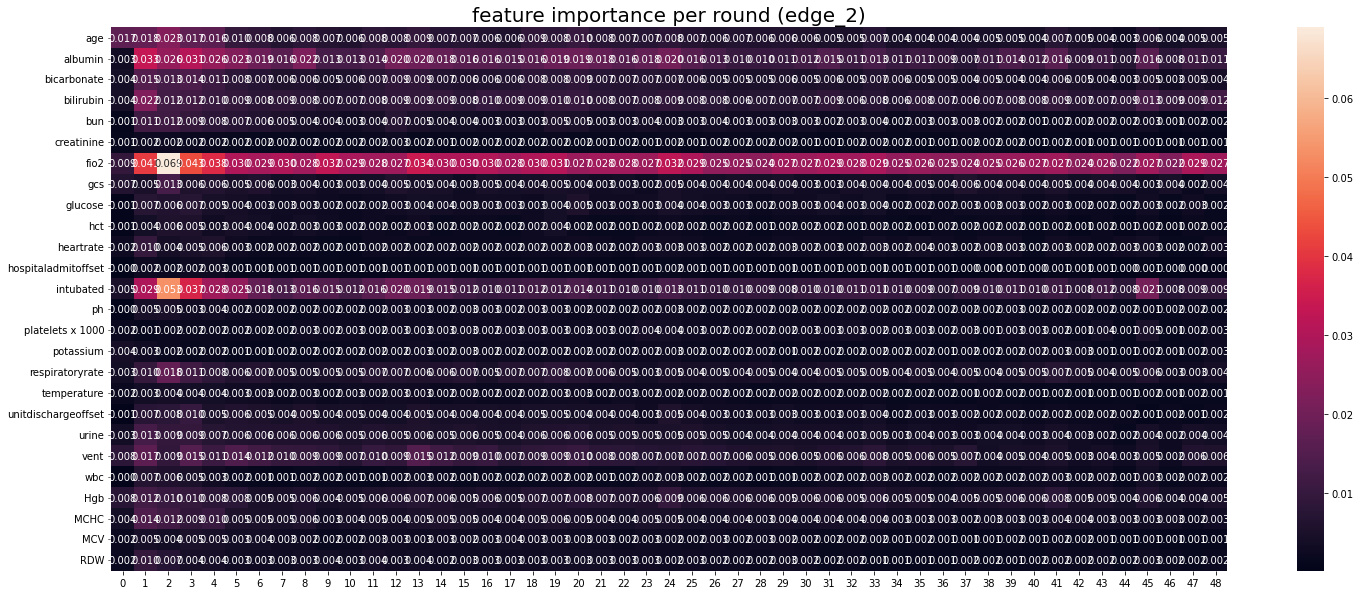

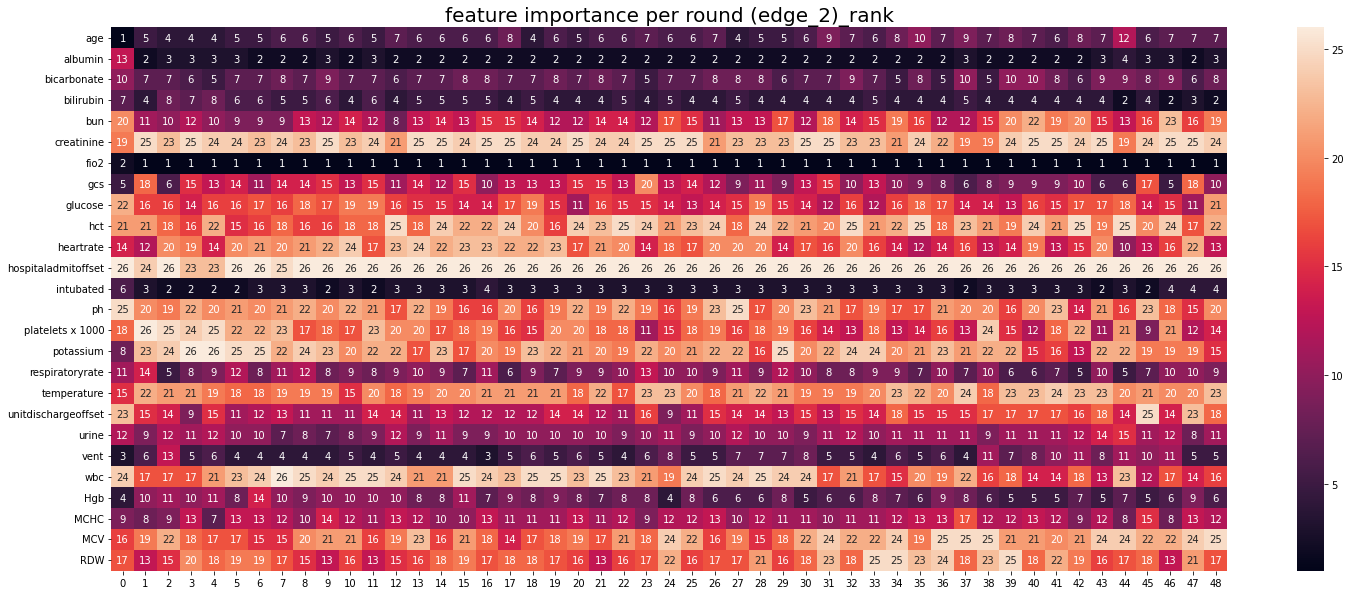

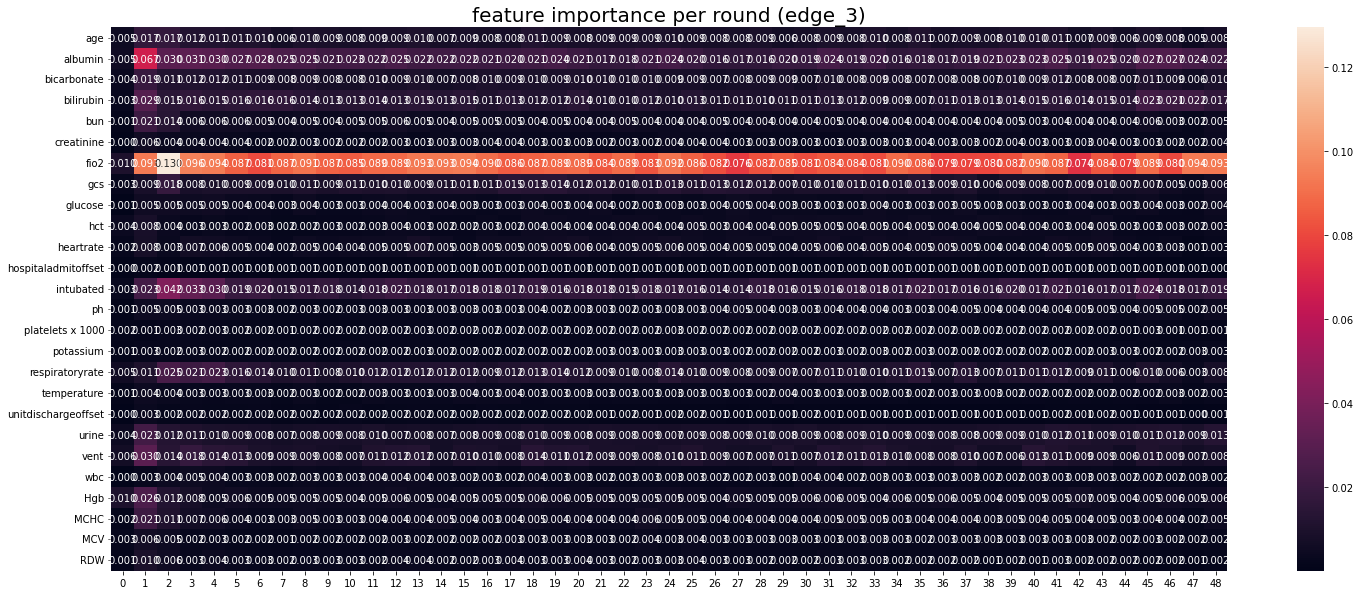

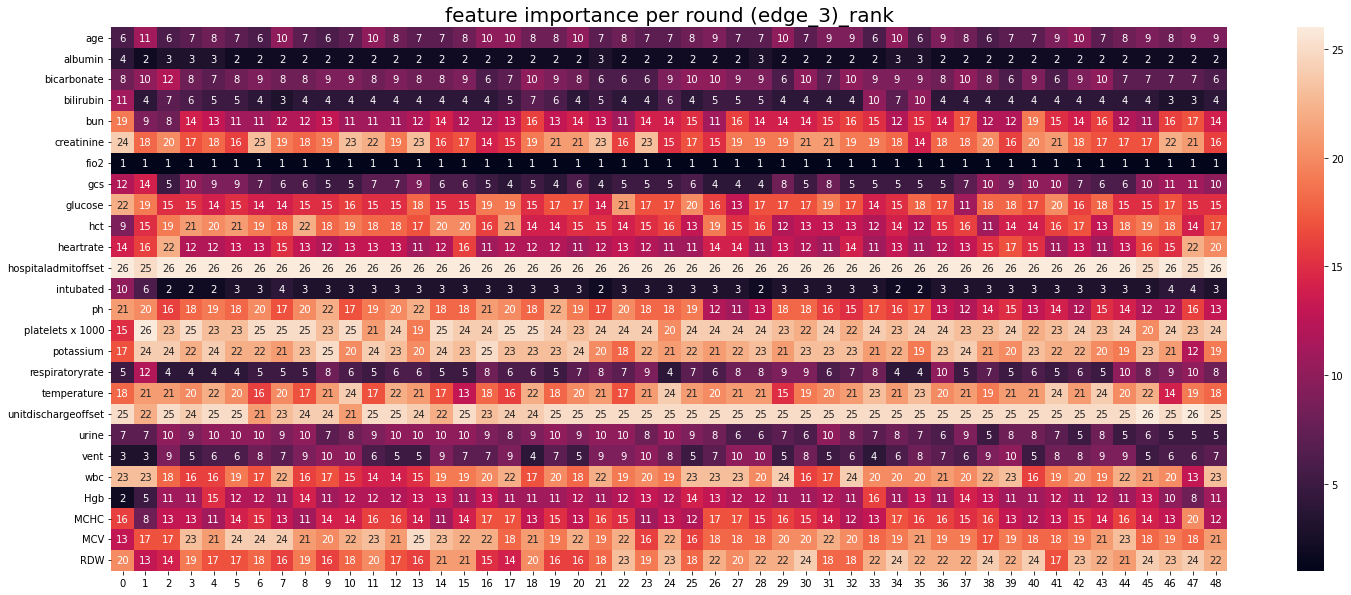

In [10]:
for edge_name in edges_name:

    fig=plt.figure()
    plt.rcParams['figure.figsize'] = [25, 10]
    sns.heatmap(feature_importance_dict[edge_name], annot=True, fmt='.3f')
    plt.title('feature importance per round ({})'.format(edge_name), fontsize=20)
    plt.savefig('{}/feature_importance_{}.png'.format(result_dir, edge_name), format='png',
            dpi=300, facecolor='white', transparent=True,  bbox_inches='tight')
    plt.show()
    
    fig=plt.figure()
    plt.rcParams['figure.figsize'] = [25, 10]
    sns.heatmap(convertRank(feature_importance_dict[edge_name]), annot=True, fmt='d')
    plt.title('feature importance per round ({})_rank'.format(edge_name), fontsize=20)
    plt.savefig('{}/feature_importance_{}_rank.png'.format(result_dir, edge_name), format='png',
            dpi=300, facecolor='white', transparent=True,  bbox_inches='tight')
    plt.show()
    


In [30]:
central_df = feature_importance_dict['central']
feature_importance_dict['central'] = pd.DataFrame(central_df[central_df.columns[-1]])
feature_importance_dict['central']  = feature_importance_dict['central'].rename({1:0}, axis=1)


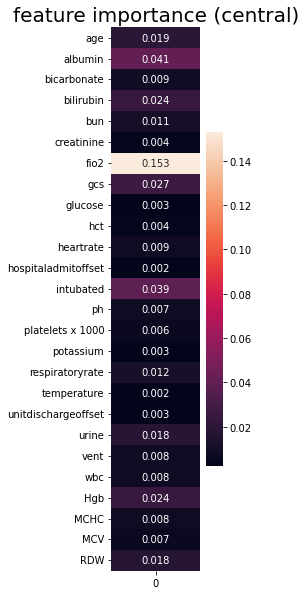

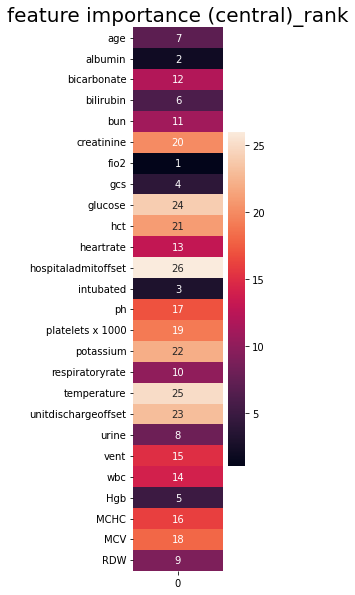

In [31]:
fig=plt.figure()
plt.rcParams['figure.figsize'] = [2, 10]
sns.heatmap(feature_importance_dict['central'], annot=True, fmt='.3f')
plt.title('feature importance ({})'.format('central'), fontsize=20)
plt.savefig('{}/feature_importance_{}.png'.format(result_dir, 'central'), format='png',
        dpi=300, facecolor='white', transparent=True,  bbox_inches='tight')
plt.show()

fig=plt.figure()
plt.rcParams['figure.figsize'] = [2, 10]
sns.heatmap(convertRank(feature_importance_dict['central']), annot=True, fmt='d')
plt.title('feature importance ({})_rank'.format('central'), fontsize=20)
plt.savefig('{}/feature_importance_{}_rank.png'.format(result_dir, 'central'), format='png',
        dpi=300, facecolor='white', transparent=True,  bbox_inches='tight')
plt.show()
